<div style="background-color: #00796B; text-align: center; padding: 20px;">
    <p style="color: white; font-size: 36px;">Mushroom Dataset using RandomForest and DecisionTree</p>
    <p style="color: white;">by: Ali Zulfikar</p>
</div>

<div style="background-color: #00796B; text-align: center; padding: 20px; border-radius: 10px;">
    <p style="color: white; font-size: 28px;">Import Library</p>
</div>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [25]:
df = pd.read_csv('data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Melihat keunikan dari fitur cap-surface</p>
</div>

In [31]:
df['cap-surface'].unique()

array([2, 3, 0, 1])

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Seberapa panjang jumlah data dan jumlah fitur dari dataset mushroom</p>
</div>

In [32]:
df.shape

(8124, 23)

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Jumlah baris = 8124</p>
    <p style="color:white; font-size: 18px;"> Jumlah fitur = 23</p>
</div>

In [33]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Terlihat data tidak ada yang null</p>
</div>

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


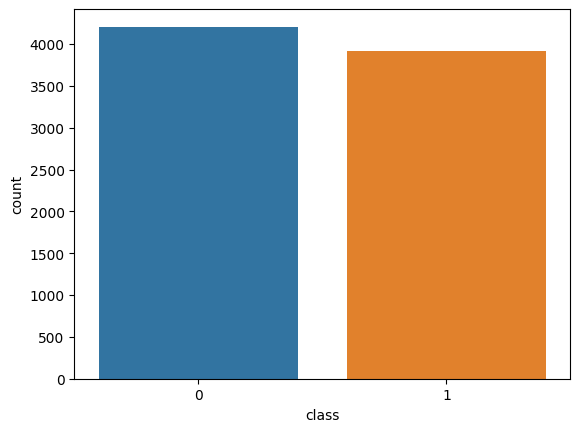

In [34]:
sns.countplot(data=df, x='class')
plt.show()

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Terlihat kategori e lebih banyak daripada kategori p</p>
</div>

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Selanjutnya melakukan transformasi data menggunakan LabelEncoder</p>
</div>

In [36]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Korelasi antar data</p>
</div>

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

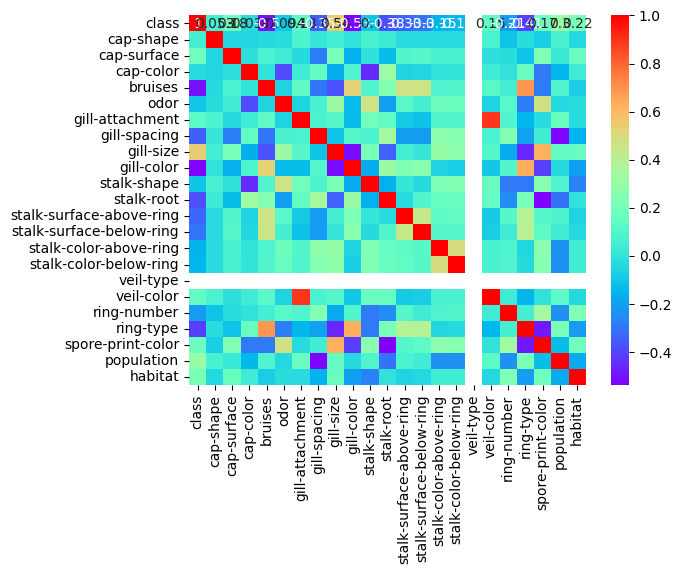

In [61]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Memisah variable dependent dengan independent</p>
</div>

In [38]:
X = df.drop(['class'], axis=1)
y = df['class']

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Split dataset menjadi 30 70</p>
</div>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

<div style="background-color: #FF796B; text-align: center; padding: 20px; border: 2px solid #FFAF50;">
    <p style="color: white; font-size: 18px;">Prediksi menggunakan DecisionTreeClassifier</p>
</div>

In [41]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=5)
dt_model.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=5, random_state=0)

In [43]:
dt_model.score(X_train, y_train)

0.9787196623285263

In [46]:
y_pred = dt_model.predict(X_test)

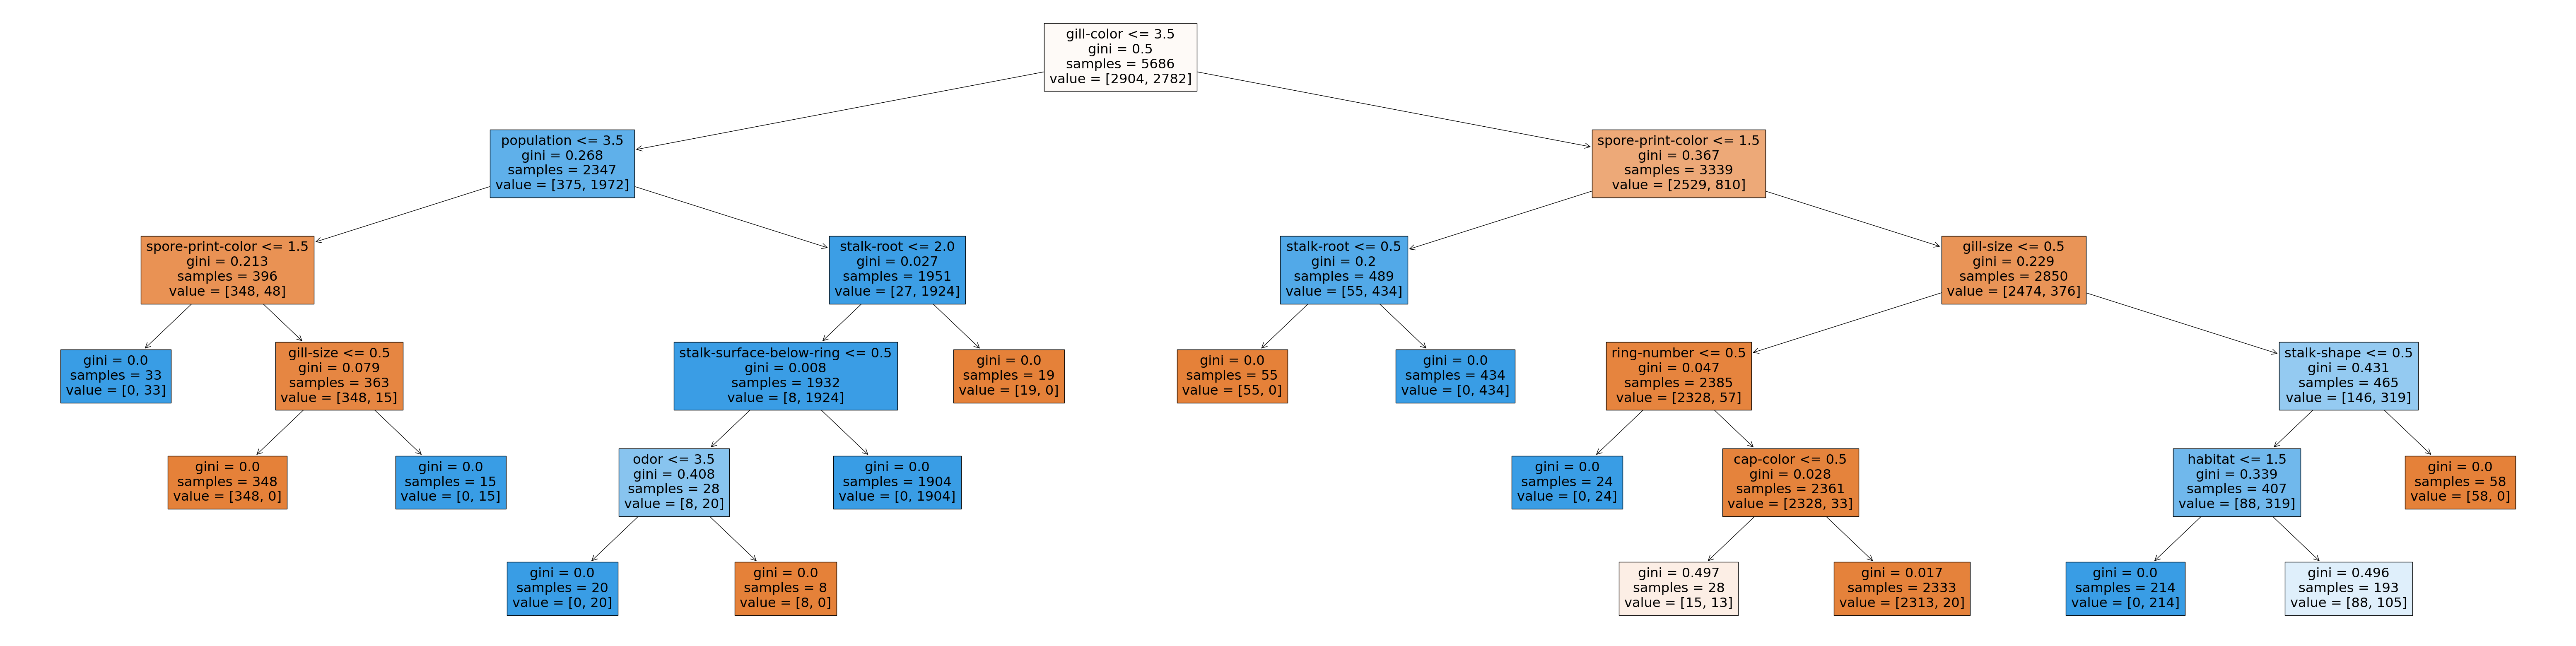

In [53]:
feature_names = X_train.columns.tolist()

plt.figure(figsize=(80, 20))
plot_tree(dt_model, feature_names=feature_names, max_depth=5, filled=True)

plt.show()

In [47]:
accuracy_score(y_test, y_pred)

0.9807219031993437

<div style="background-color: #FF796B; text-align: center; padding: 20px; border: 2px solid #FFAF50;">
    <p style="color: white; font-size: 18px;">Prediksi menggunakan RandomForestTree</p>
</div>

In [57]:
rft_model = RandomForestClassifier(max_depth=5)
rft_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [58]:
y_pred_rft = rft_model.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred_rft)

0.9905660377358491

## Hasil AKhir

Decision Tree = 97%
Random Forest = 99%

<div style="background-color: #FF796B; text-align: center; padding: 20px; border: 2px solid #FFDF50;">
    <p style="color: white; font-size: 18px;">Hyperparameter Tuning</p>
</div>

In [62]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [63]:
grid = GridSearchCV(estimator=dt_model, param_grid=params, cv=4)

In [65]:
%%time
grid.fit(X_train, y_train)

CPU times: total: 484 ms
Wall time: 1.61 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [66]:
score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008263,0.002072,0.001732,0.001825,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.917018,0.903657,0.913441,0.909923,0.91101,0.004931,46
1,0.002006,0.003475,0.001998,0.003461,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.917018,0.903657,0.913441,0.909923,0.91101,0.004931,46
2,0.004007,0.004007,0.001998,0.003461,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.917018,0.903657,0.913441,0.909923,0.91101,0.004931,46
3,0.004005,0.004005,0.002004,0.003471,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.917018,0.903657,0.913441,0.909923,0.91101,0.004931,46
4,0.000000,0.000000,0.002005,0.003473,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.917018,0.903657,0.913441,0.909923,0.91101,0.004931,46


In [67]:
dt_model_best = grid.best_estimator_

In [68]:
y_pred = dt_model_best.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

1.0

Hasil akhir didapatkan dengan Hyperparameter Tuning yaitu 100%

<div style="background-color: #3e8c53; text-align: center; padding: 20px; border: 2px solid #3F8c53;">
    <p style="color: white; font-size: 18px;">AdaBoost</p>
</div>

In [74]:
ab_model = AdaBoostClassifier()

In [75]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

In [76]:
grid_search = GridSearchCV(estimator=ab_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWar

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [77]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 50}


In [78]:
best_ab_model = AdaBoostClassifier(**best_params)
best_ab_model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [79]:
y_pred_ab = best_ab_model.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred_ab)

1.0

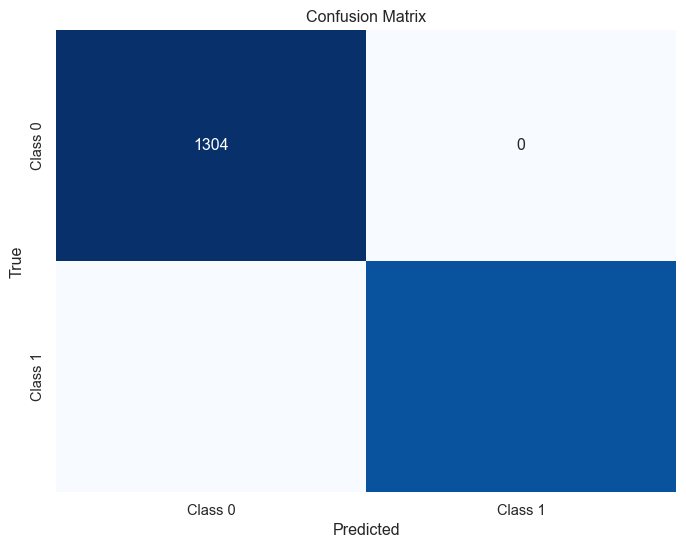

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.2)

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()